In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (10, 6)

In [18]:
data =load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

costruiamo un var plot sul target (valori delle 3 specie) per vedere quanto il nostro dataset sia bilanciato

In [19]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

/var/folders/13/r2qtp3l16ngdy08zglqkfxyc0000gn/T/ipykernel_1911/1384497820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.target, data=data, palette=palette)


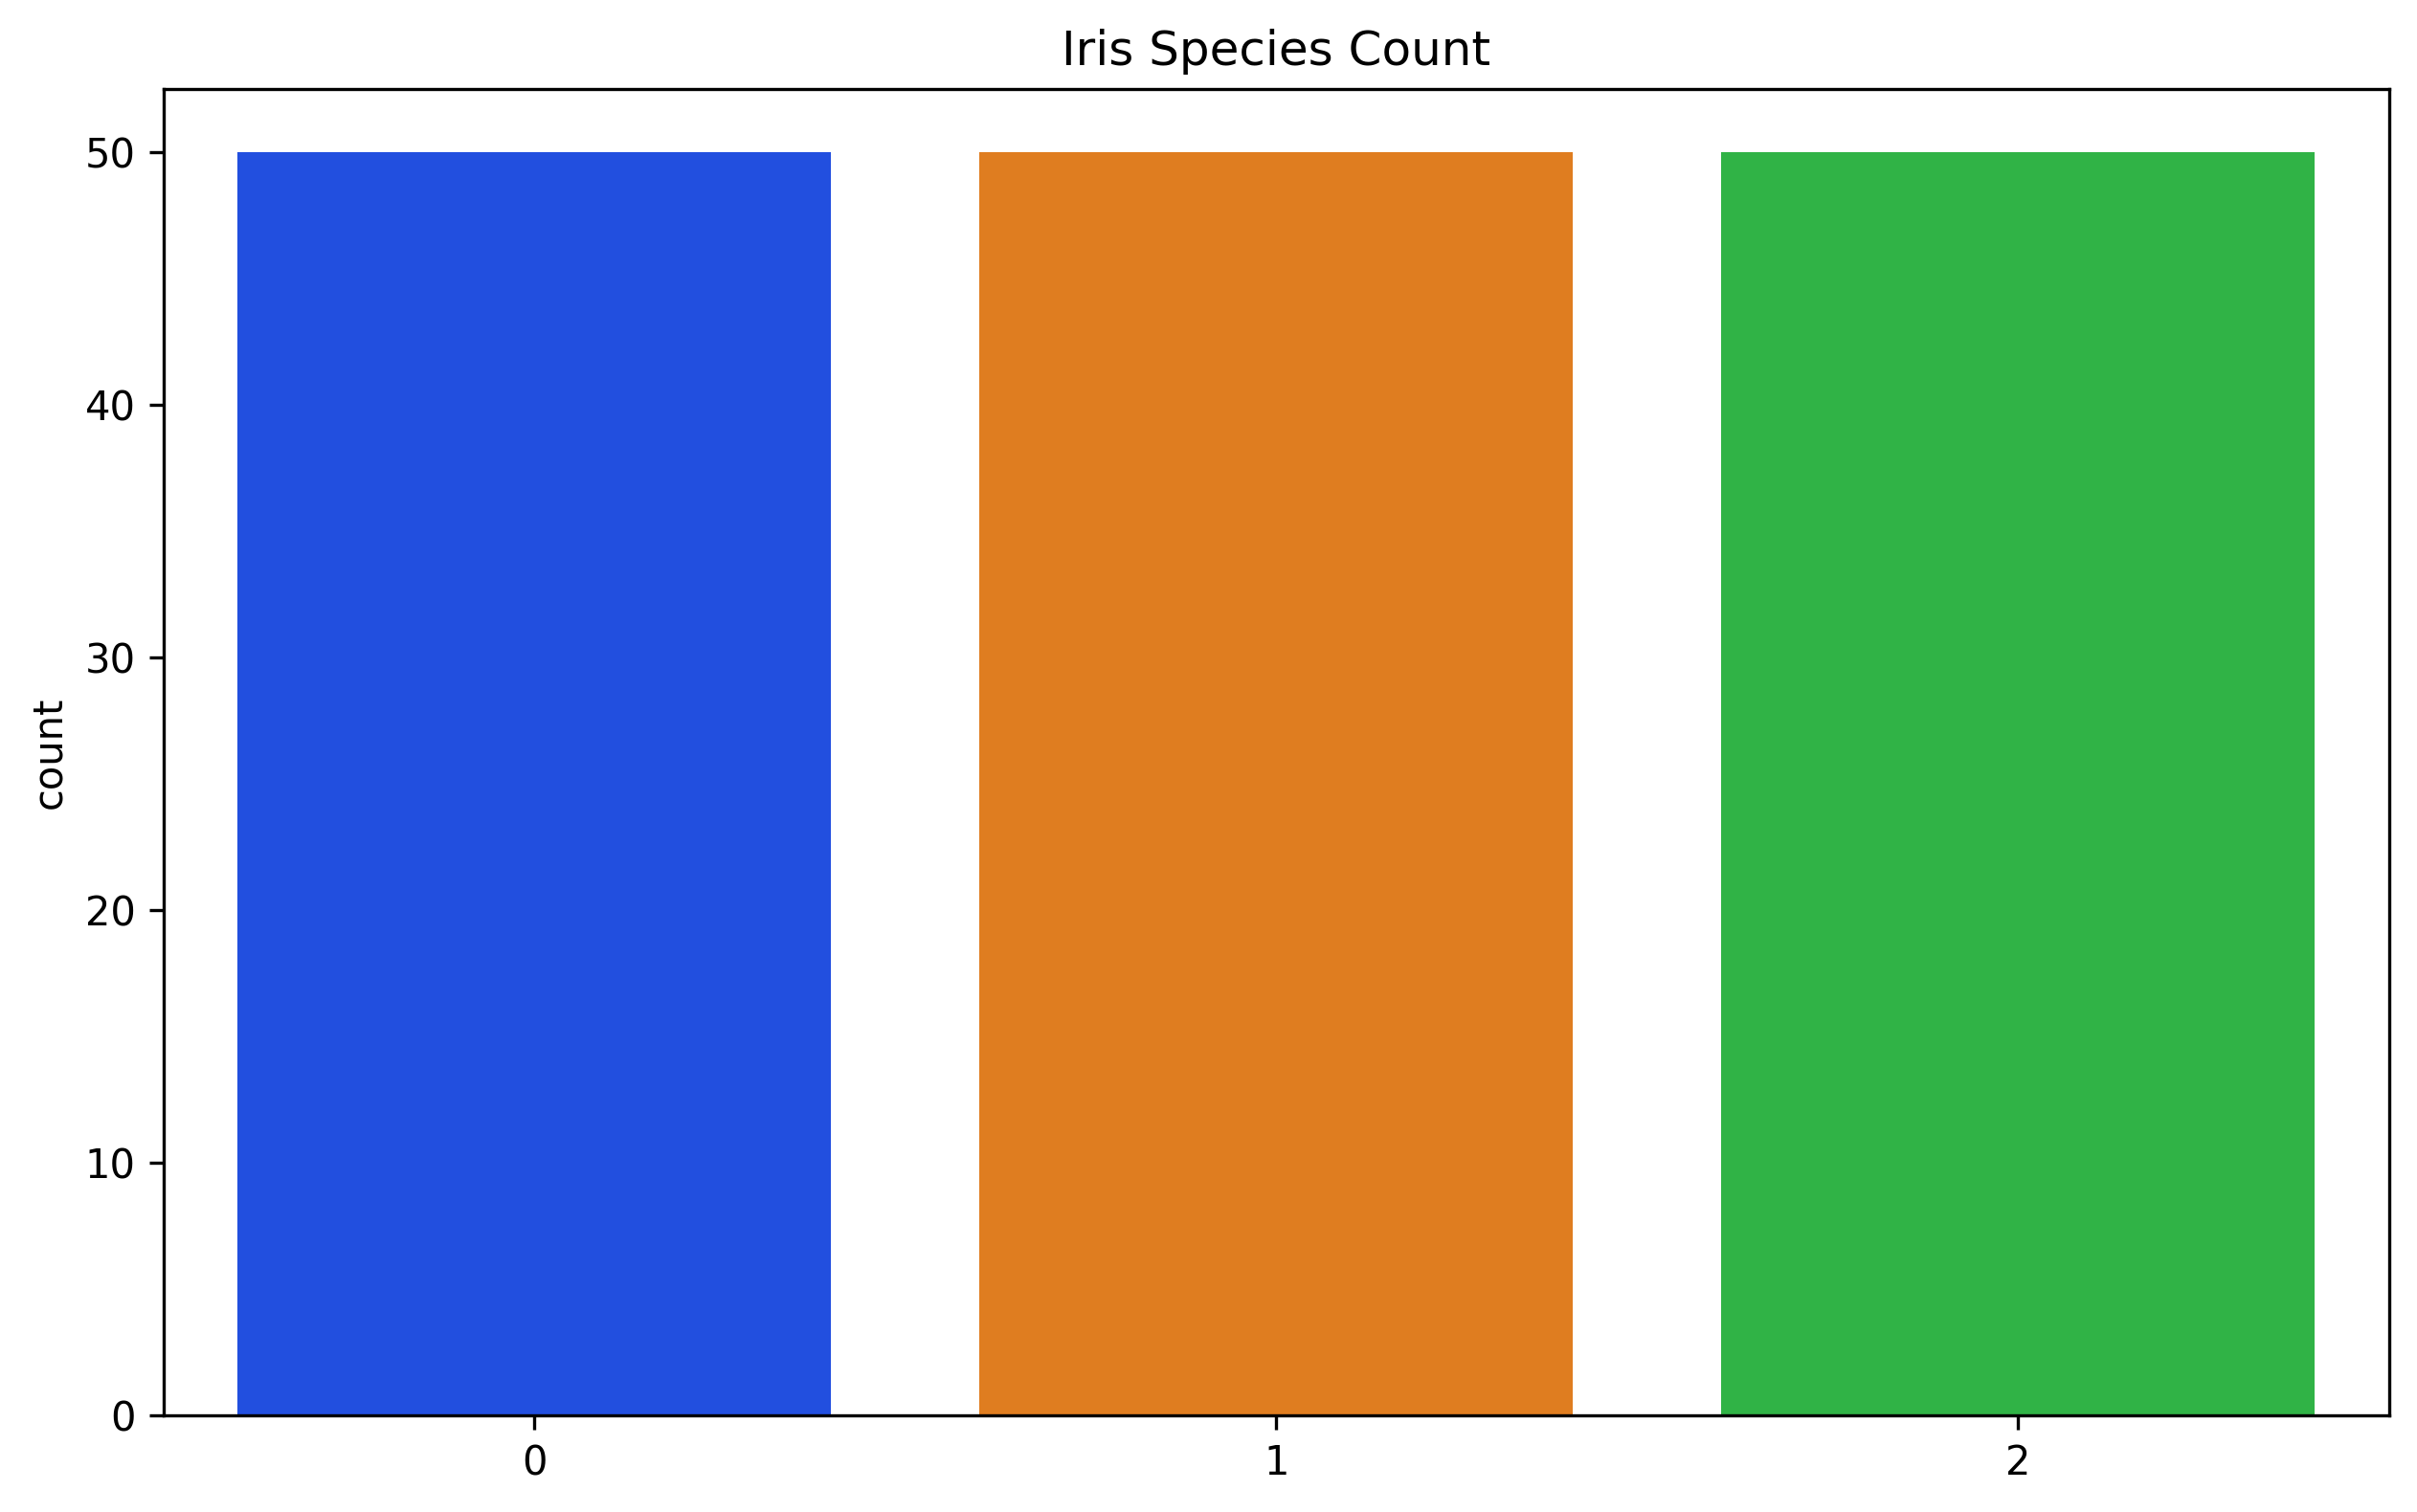

In [29]:
palette = sns.color_palette("bright", 3)
sns.countplot(x=data.target, data=data, palette=palette)
plt.title("Iris Species Count")
plt.show()

In [30]:
y= data.target
print(y.shape)

(150,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.data, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


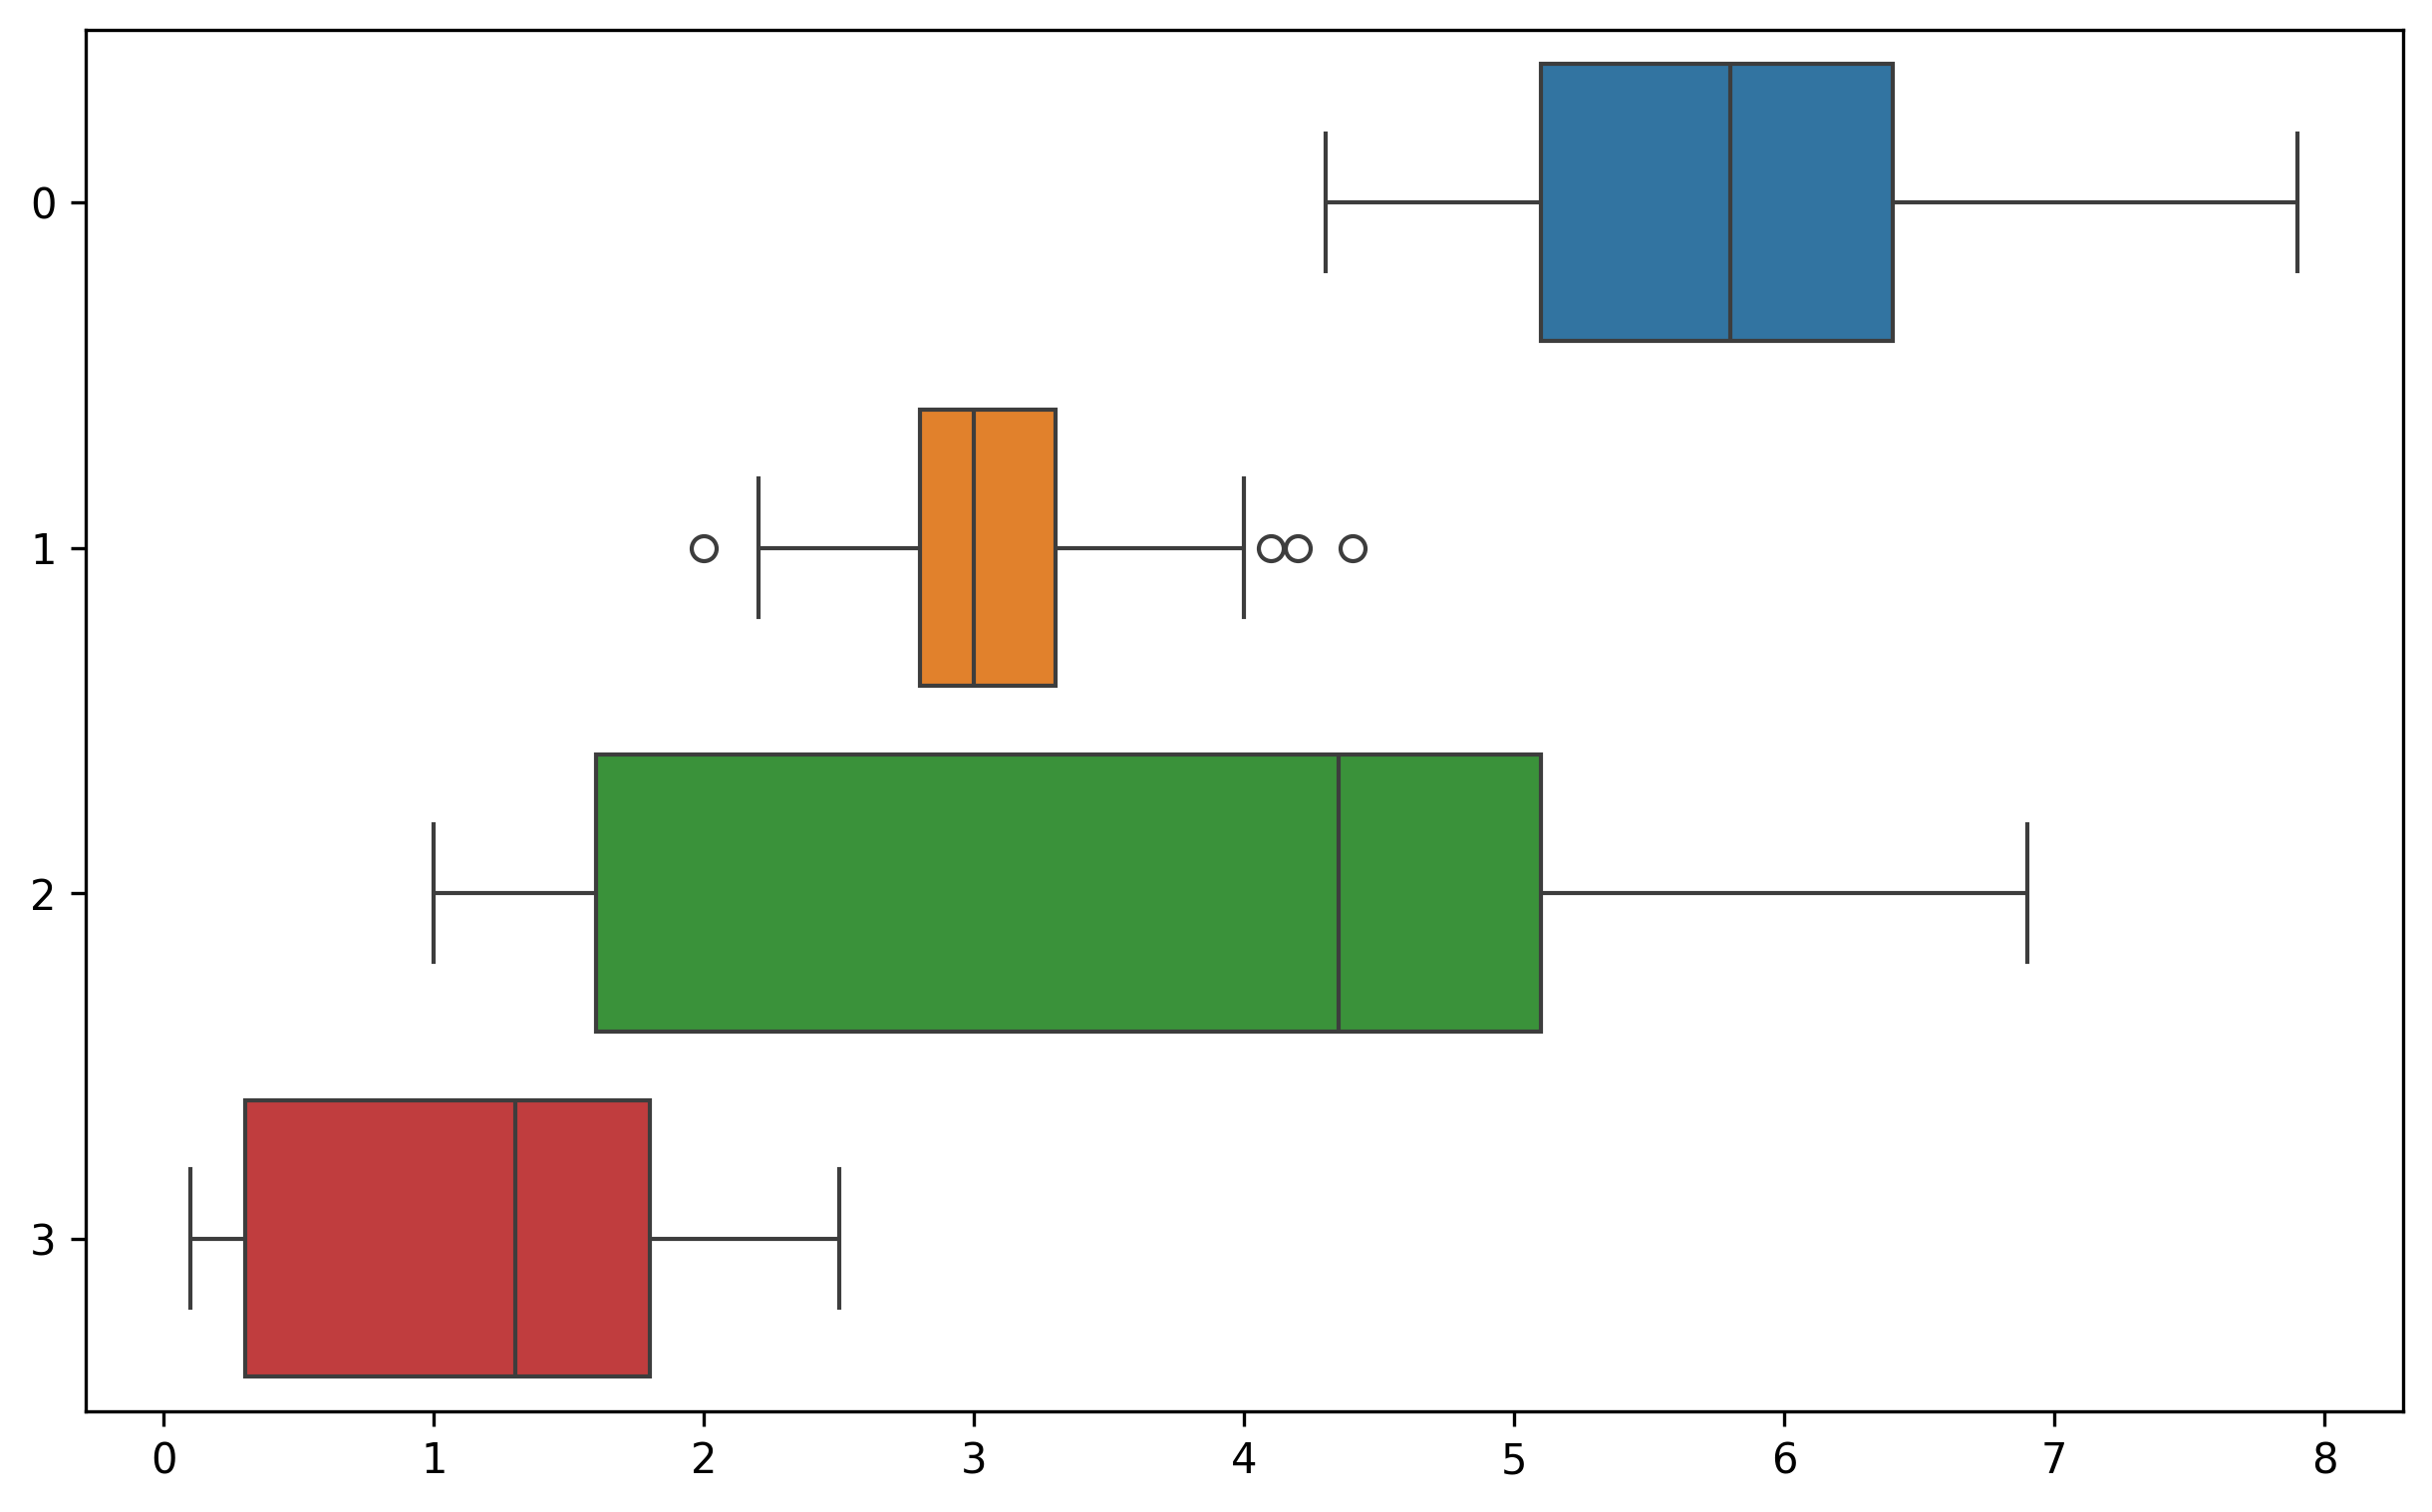

In [33]:
#preprocessing dei dati, vanno normalizzati
sns.boxplot(data=data.data, orient="h")   #importante perche fornisce indicazioni sulla scala in cui si trovano gli elementi
plt.show()

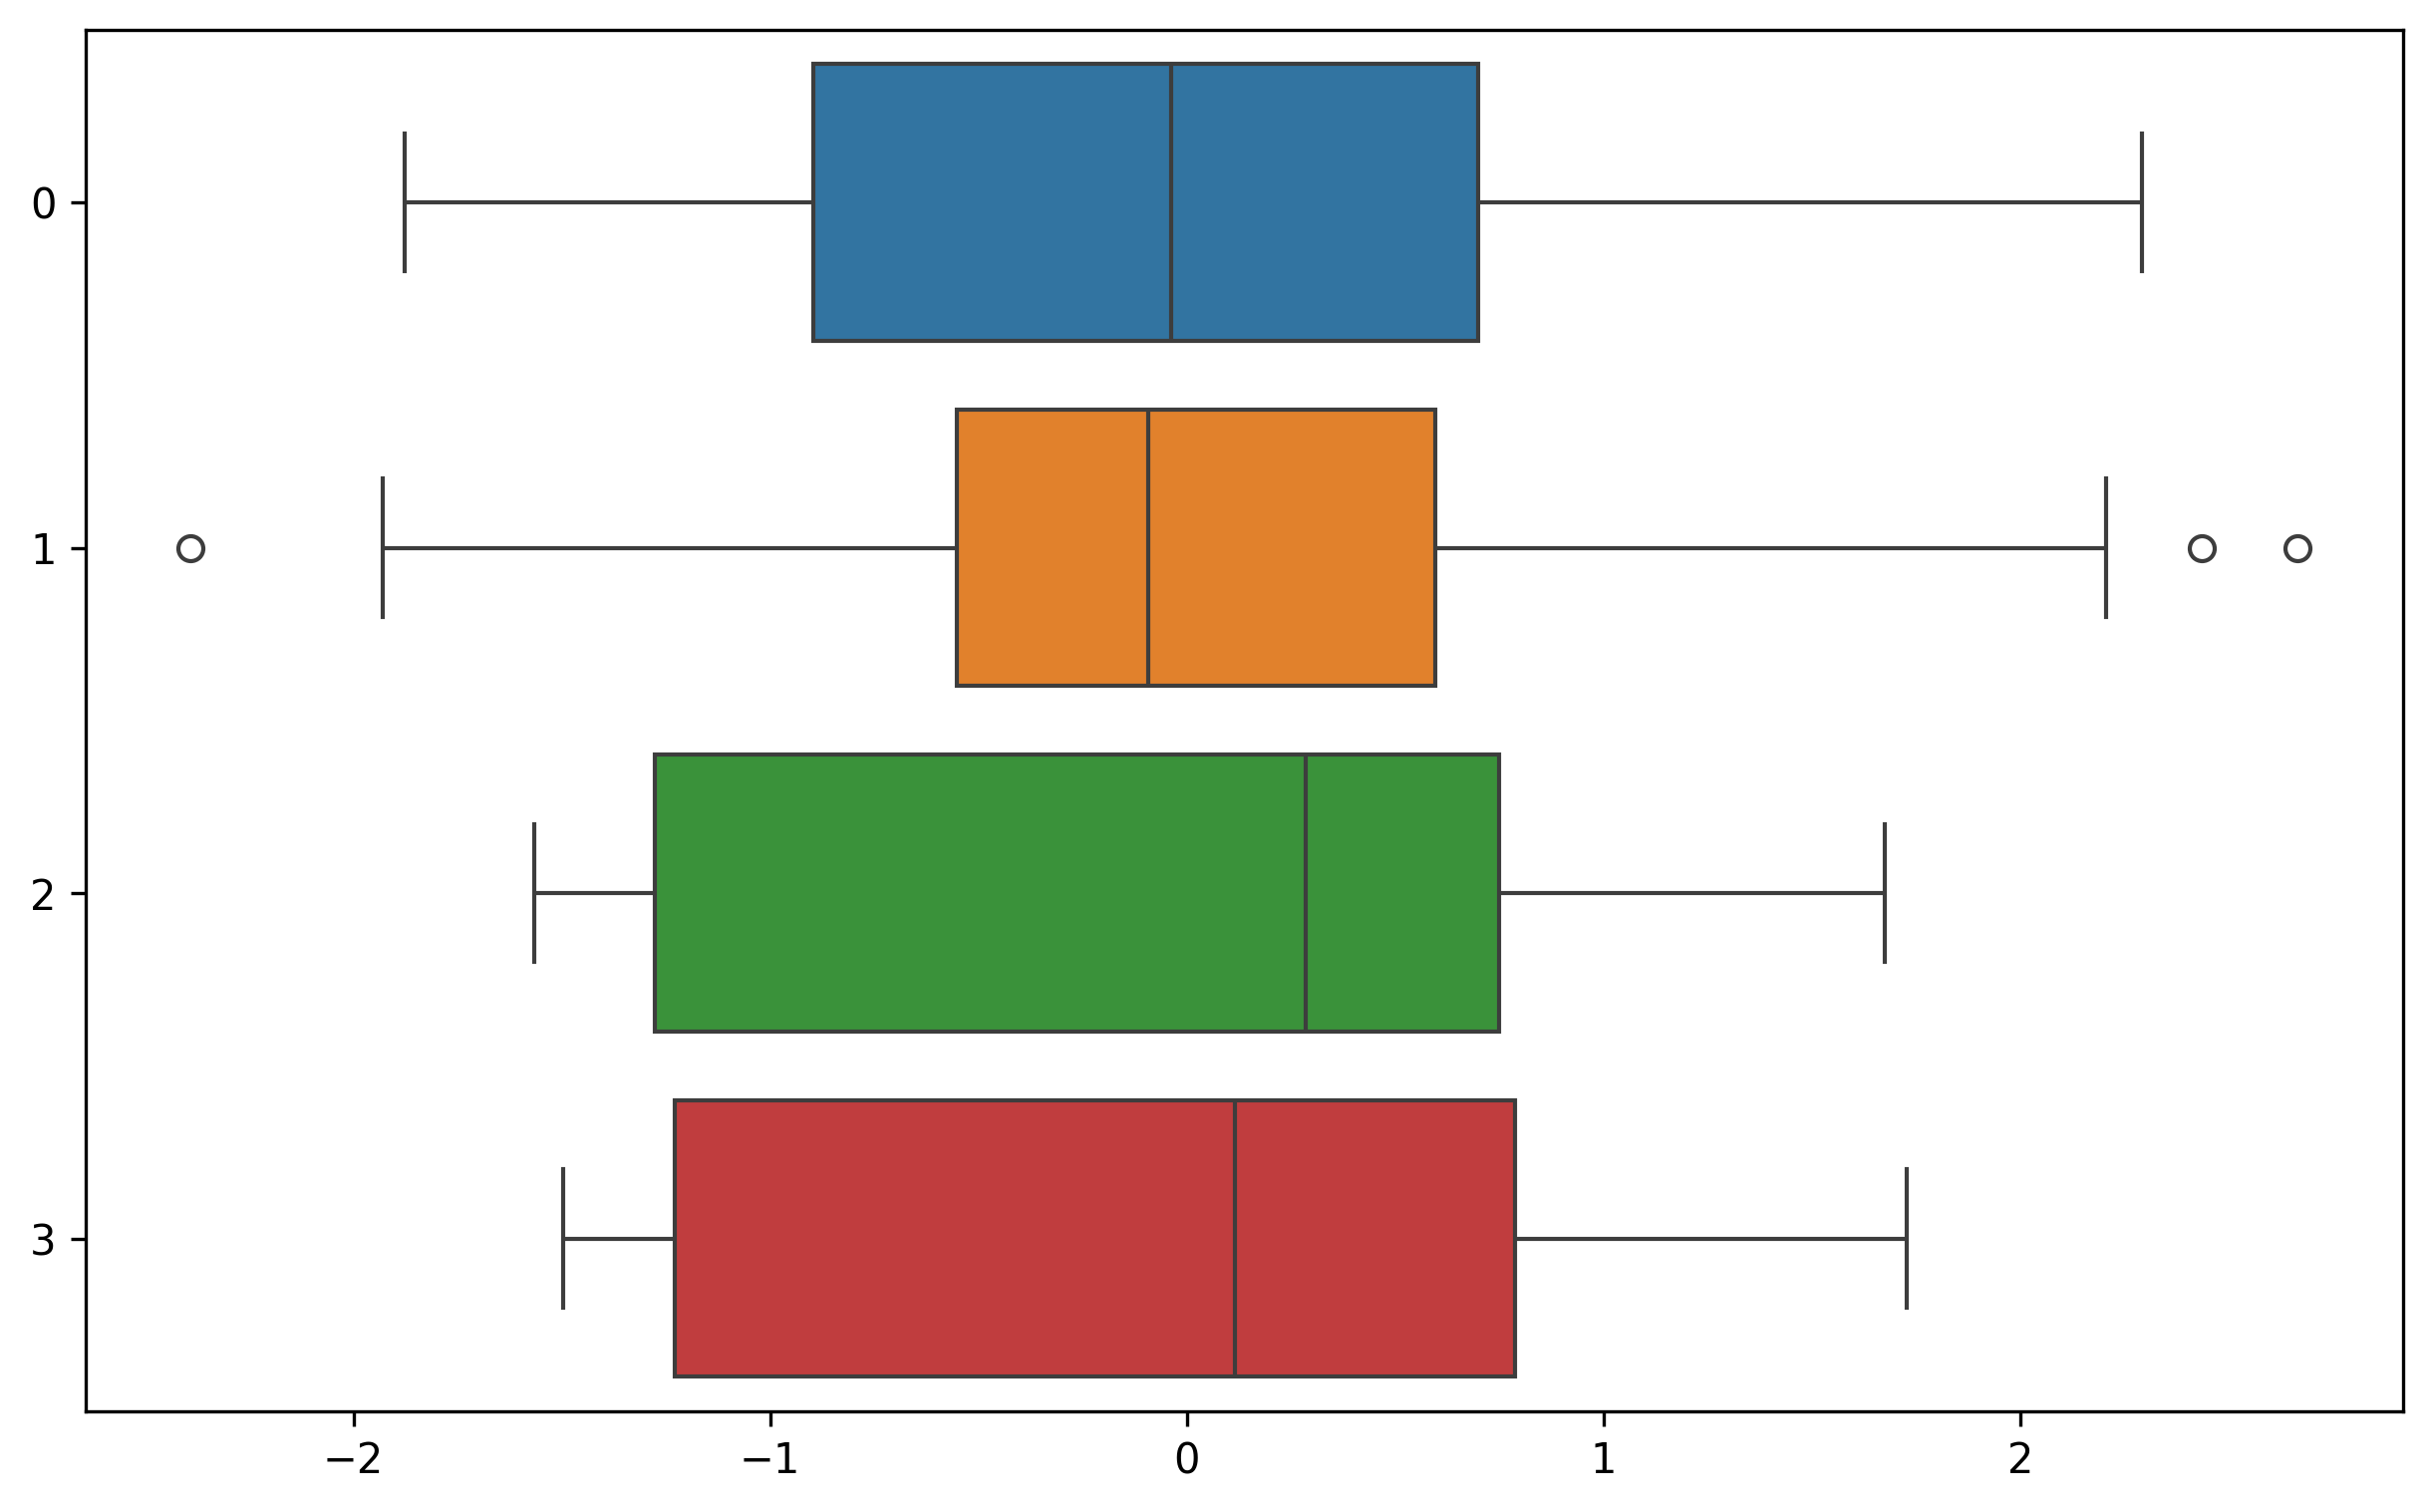

In [36]:
scaler=StandardScaler()
scaler.fit(X_train)
#i dati di test devono esssere scalati ma non utilizzati durante il fit dello scaler, rende piu efficaci le metriche
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
sns.boxplot(data=X_train, orient="h")   #importante perche fornisce indicazioni sulla scala in cui si trovano gli elementi
plt.show()

In [39]:
eucl_clf=KNeighborsClassifier(
    p=2, #la distanza euclidea ha elevazione alla 2
    n_neighbors=5,
)

manh_clf=KNeighborsClassifier(
    p=1,
    n_neighbors=5
)

mahal_clf= KNeighborsClassifier(
    n_neighbors=5,
    metric="mahalanobis",
    #specifichiamo i parametri della matrice di covarianza utilizzati nella distanza
    metric_params={"V":np.cov(X_train, rowvar=False)} #False mette le osservazioni alle righe  
)

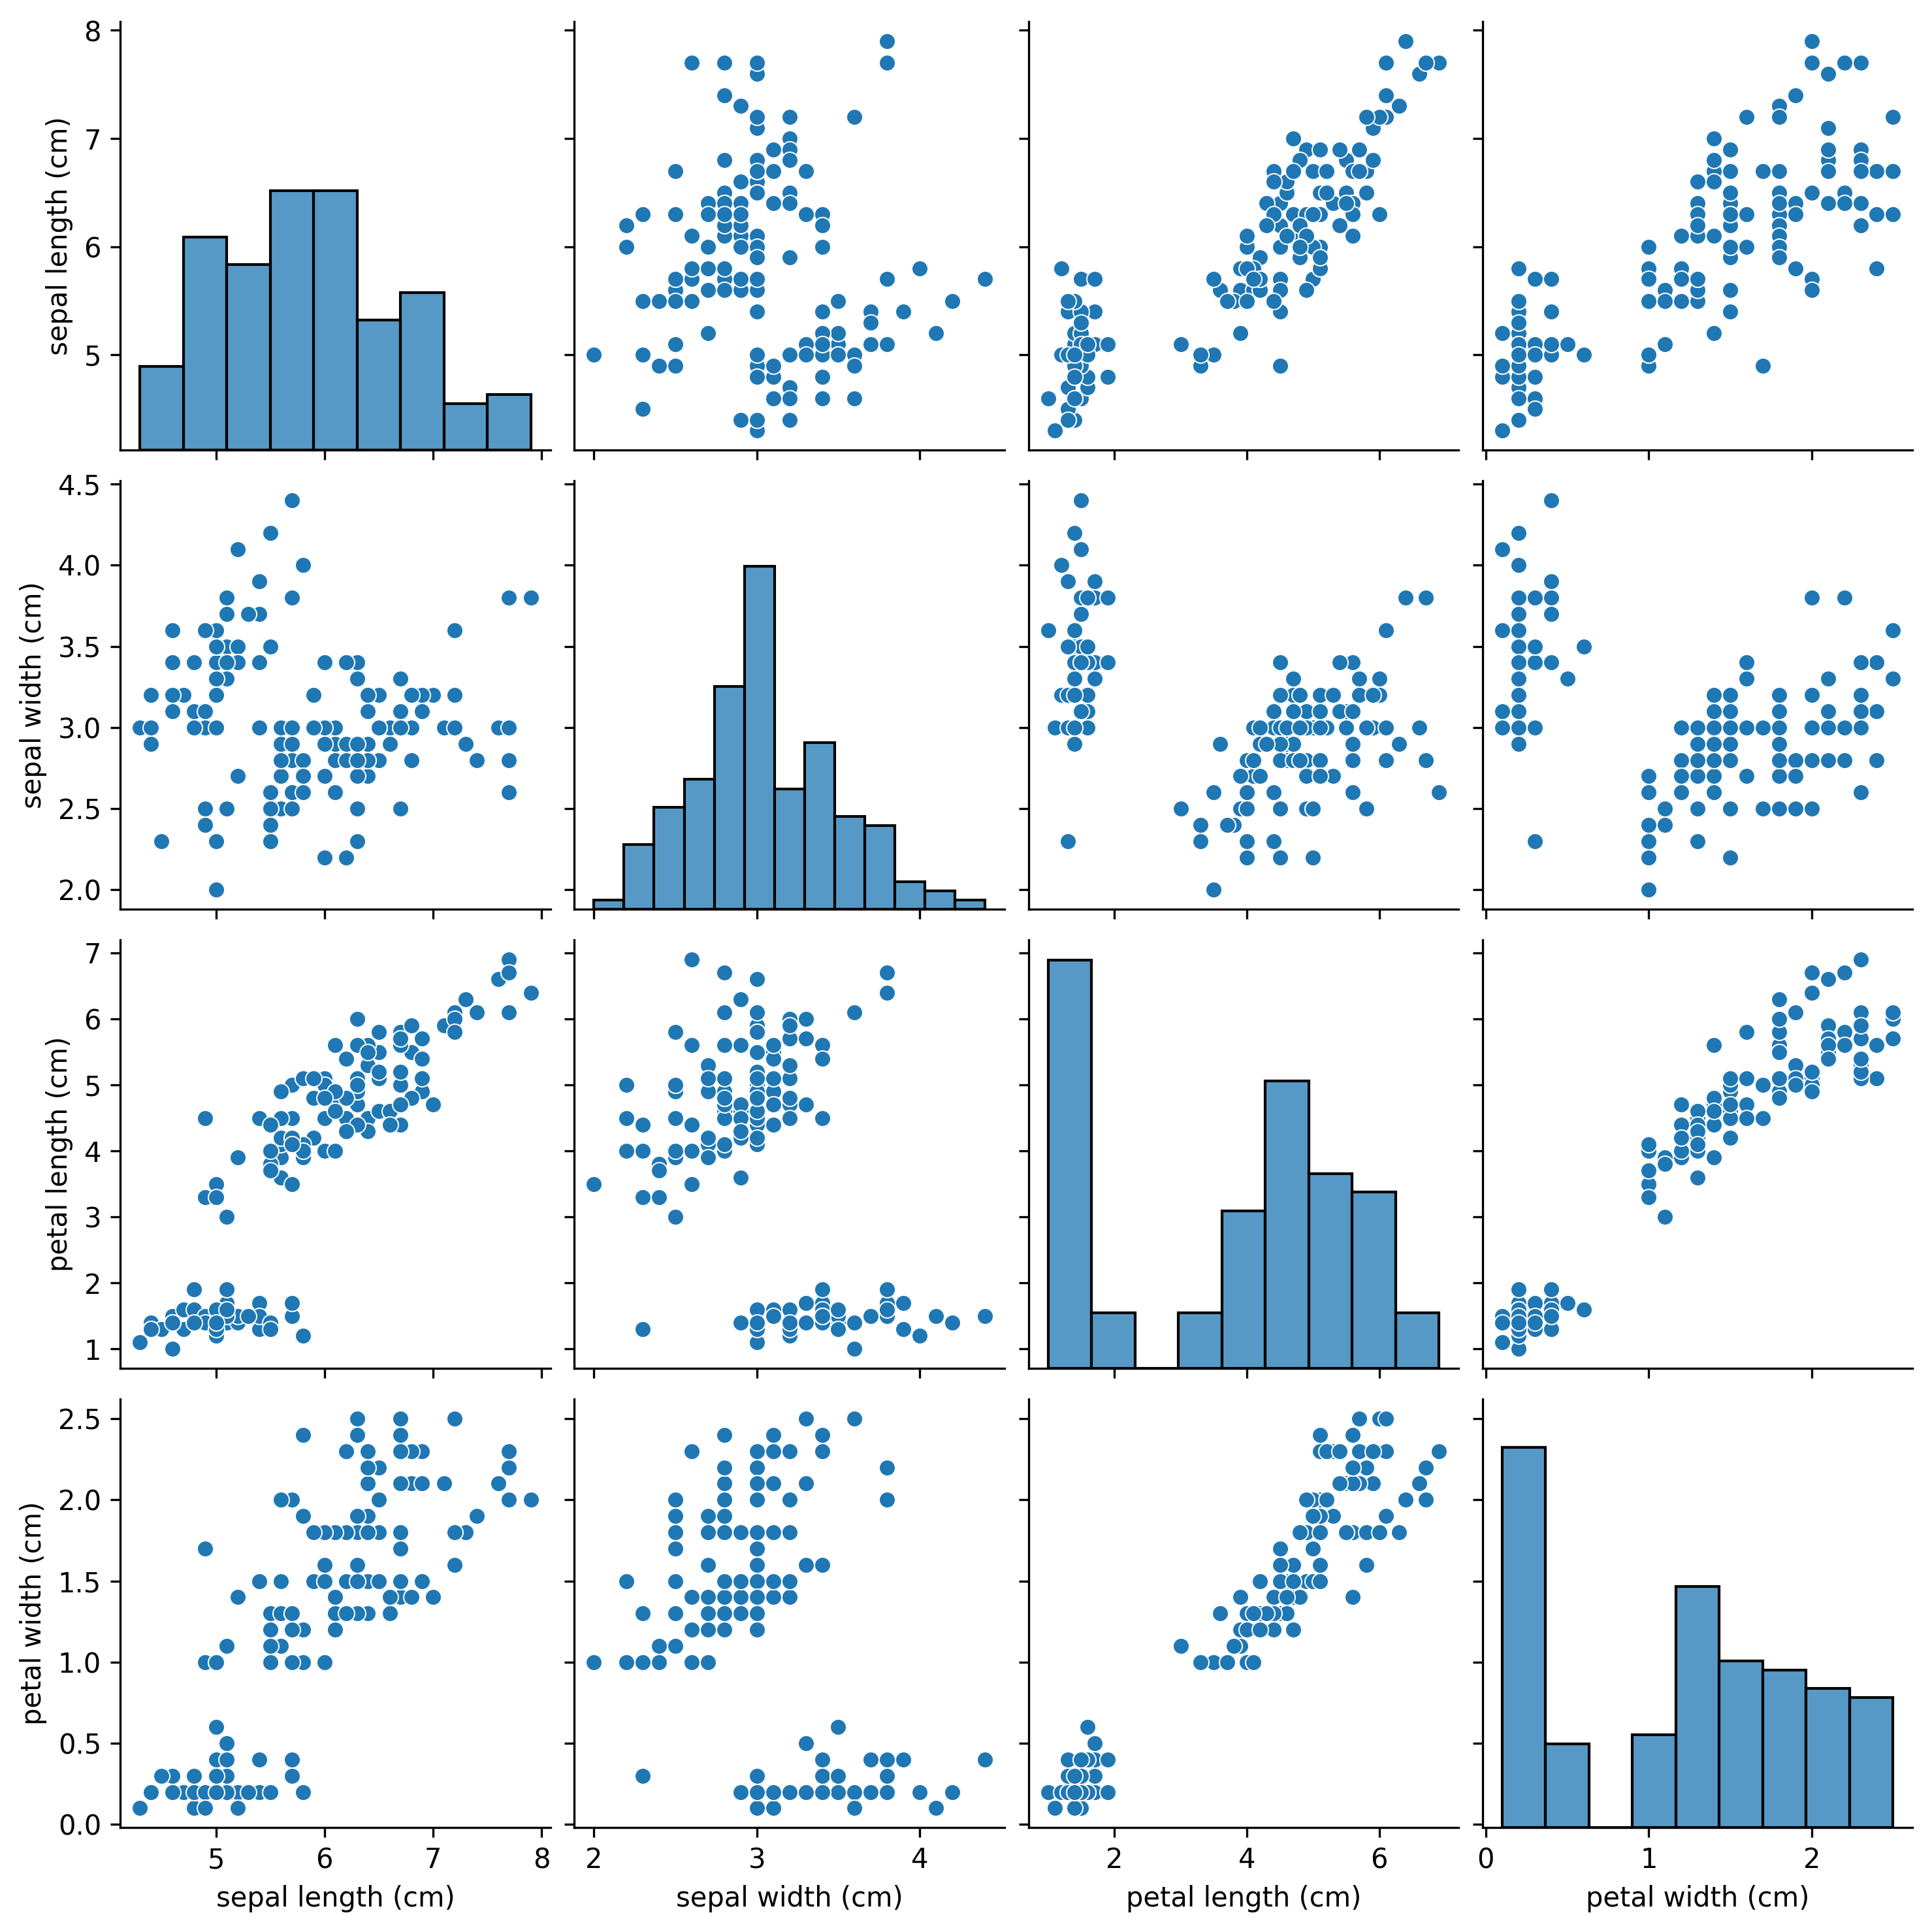

In [40]:
sns.pairplot(pd.DataFrame(data.data, columns=data.feature_names))

sulla diagonale principale abbiamo la distibuzione degli attributi, mentre sulle altre celle c'è un indice della correlazione tra le variabili.

In [41]:
def train_and_test(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

In [42]:
train_and_test(eucl_clf,X_train,y_train, X_test, y_test)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [43]:
train_and_test(manh_clf,X_train,y_train, X_test, y_test)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [44]:
train_and_test(mahal_clf,X_train,y_train, X_test, y_test)

[[15  0  0]
 [ 0  9  2]
 [ 0  1 11]]
0.9210526315789473


In [47]:
accuracies=[]
r=range(1,40)
for i in r:
    knn=KNeighborsClassifier(
        n_neighbors=i,
        metric="mahalanobis",
        metric_params={"V":np.cov(X_train, rowvar=False)} 
    )
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


In [46]:
accuracies

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.9210526315789473,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632]

Text(0, 0.5, 'accuracy')

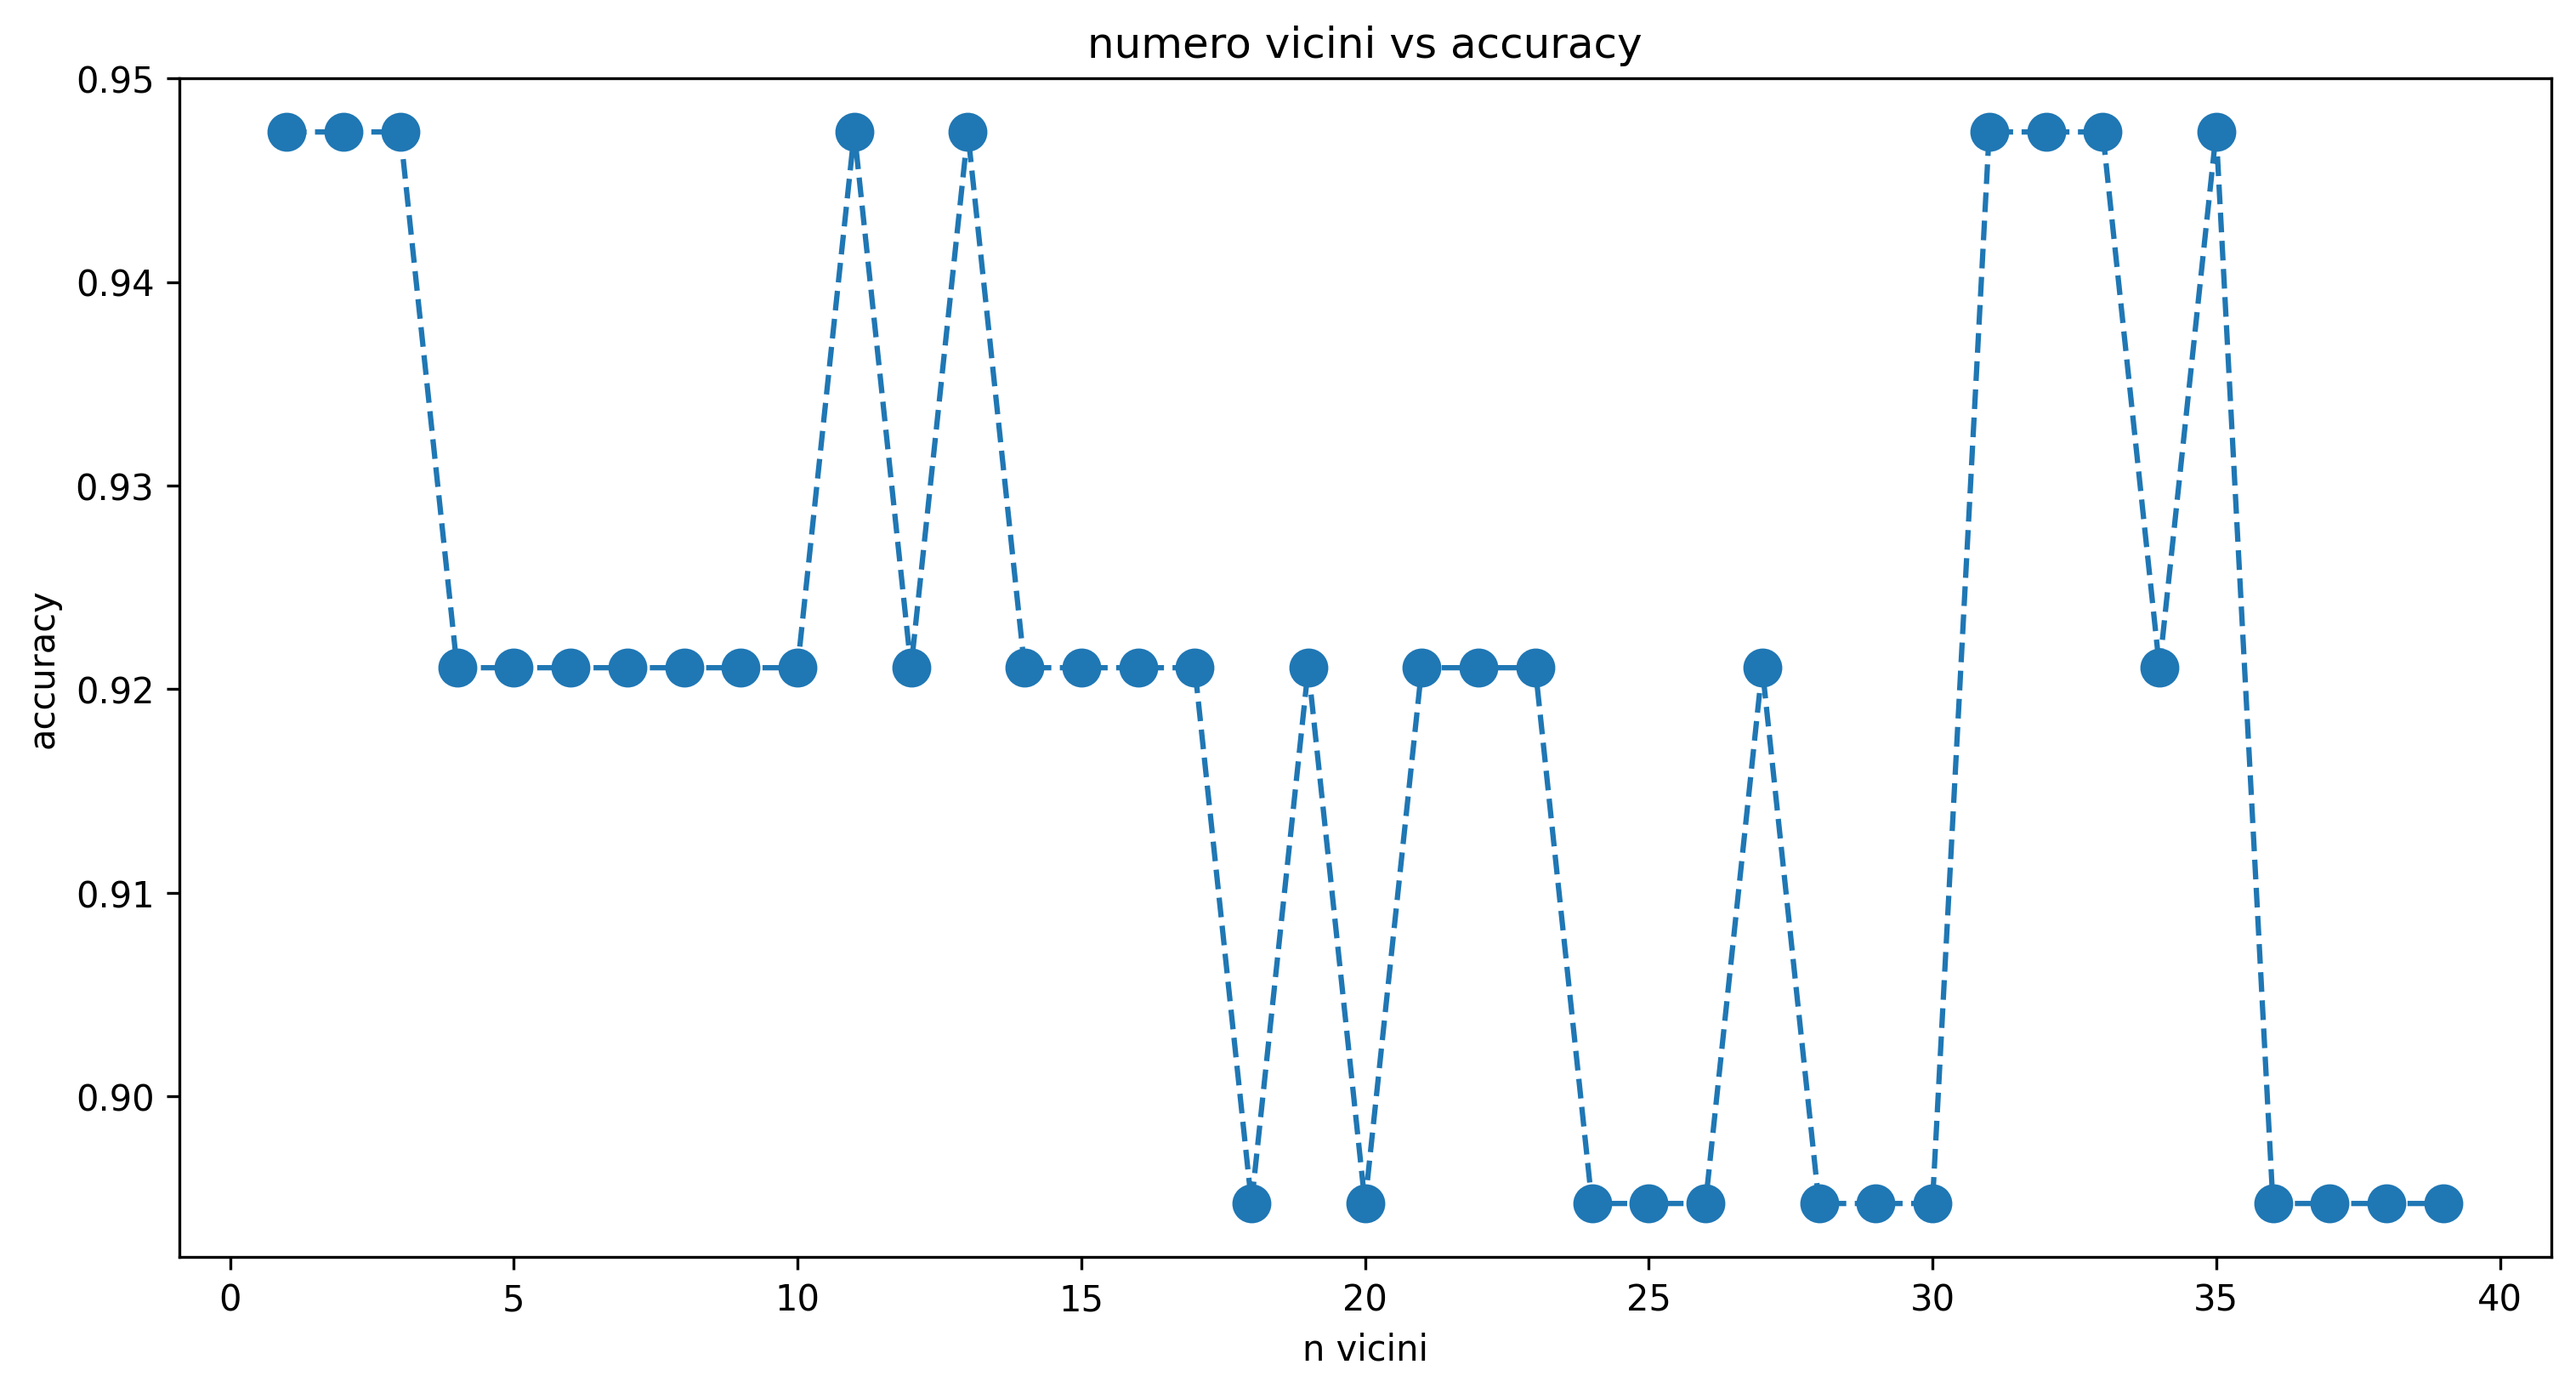

In [48]:
plt.figure(figsize=(12,6))
plt.plot(
    r,
    accuracies,
    linestyle="dashed",
    marker="o",
    markersize=10
)

plt.title("numero vicini vs accuracy")
plt.xlabel("n vicini")
plt.ylabel("accuracy")

In [51]:
print(np.array(accuracies).argmin())
np.array(accuracies).argmax()

17


0

In [54]:
knn=KNeighborsClassifier(
    n_neighbors=1,
    metric="mahalanobis",
    metric_params={"V":np.cov(X_train, rowvar=False)} 
)

train_and_test(knn, X_train, y_train, X_test, y_test)

[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
0.9473684210526315


abbiamo aumentato l'accuracy